### Work plan:
- scraping data from website
- data understanding
- data preparation
  - detecting and cleaning outliers
  - scaling numerical features
  - encoding categorical features
- modeling
- evaluation
- building streamlit app

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
df = pd.read_csv('cars.csv')
df.head(10)

,Unnamed: 0,Mark,Model,Year,Body_type,Color,Capacity,HorsePowers,EngineType,Transmission,Mileage,Is_new,Price,Price_currency,Link
0,0,Chevrolet,Cobalt,2022,Sedan,Ağ,1.5,106,Benzin,Avtomat,0,Bəli,23000,AZN,https://turbo.az//autos/6563353-chevrolet-cobalt
1,1,Toyota,Prado,2008,Offroader / SUV,Ağ,2.7,163,Benzin,Avtomat,137500,Xeyr,37000,AZN,https://turbo.az//autos/7242557-toyota-prado
2,2,Mercedes,S 560 4Matic,2017,Sedan,Qara,4.0,469,Benzin,Avtomat,49000,Xeyr,89777,USD,https://turbo.az//autos/7397776-mercedes-s-560...
3,3,Kia,Sorento,2020,Offroader / SUV,Mavi,1.6,230,Hibrid,Avtomat,22000,Xeyr,38500,USD,https://turbo.az//autos/7358108-kia-sorento
4,4,Mercedes,CLA 45 S AMG,2016,Sedan,Qara,2.0,381,Benzin,Avtomat,91000,Xeyr,37000,USD,https://turbo.az//autos/7224943-mercedes-cla-4...
5,5,Mercedes,170 V,1938,Kupe,Qara,2.4,85,Benzin,Mexaniki,82000,Xeyr,850000,USD,https://turbo.az//autos/6394429-mercedes-170-v
6,6,Hyundai,IONIQ Hybrid,2019,Liftbek,Ağ,1.6,109,Benzin,Avtomat,160000,Xeyr,25900,AZN,https://turbo.az//autos/6900519-hyundai-ioniq-...
7,7,Land Rover,Range Rover,2016,Offroader / SUV,Qara,5.0,510,Benzin,Avtomat,105800,Xeyr,79500,USD,https://turbo.az//autos/7398847-land-rover-ran...
8,8,BMW,328,2012,Sedan,Göy,2.0,245,Benzin,Avtomat,133000,Xeyr,25800,AZN,https://turbo.az//autos/7417791-bmw-328
9,9,Hyundai,Sonata,2015,Sedan,Qara,2.0,245,Benzin,Avtomat,112000,Xeyr,28900,AZN,https://turbo.az//autos/7315149-hyundai-sonata


## Data Understanding

In [3]:
# looking at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      14940 non-null  int64  
 1   Mark            14940 non-null  object 
 2   Model           14940 non-null  object 
 3   Year            14940 non-null  int64  
 4   Body_type       14940 non-null  object 
 5   Color           14940 non-null  object 
 6   Capacity        14940 non-null  float64
 7   HorsePowers     14940 non-null  int64  
 8   EngineType      14940 non-null  object 
 9   Transmission    14940 non-null  object 
 10  Mileage         14940 non-null  int64  
 11  Is_new          14940 non-null  object 
 12  Price           14940 non-null  int64  
 13  Price_currency  14940 non-null  object 
 14  Link            14940 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.7+ MB


In [4]:
# looking at descriptive stats
df.describe()

,Unnamed: 0,Year,Capacity,HorsePowers,Mileage,Price
count,14940.000000,14940.000000,14940.000000,14940.000000,1.494000e+04,14940.000000
mean,7469.500000,2011.630254,2.332684,193.181660,1.568781e+05,33052.621084
std,4312.950846,8.194591,1.352645,105.859817,1.400455e+05,37828.279130
min,0.000000,1938.000000,0.000000,3.000000,0.000000e+00,530.000000
25%,3734.750000,2007.000000,1.600000,115.000000,5.200000e+04,14200.000000
50%,7469.500000,2013.000000,2.000000,170.000000,1.460000e+05,23900.000000
75%,11204.250000,2017.000000,2.500000,245.000000,2.210000e+05,37900.000000
max,14939.000000,2023.000000,15.000000,761.000000,2.000000e+06,850000.000000


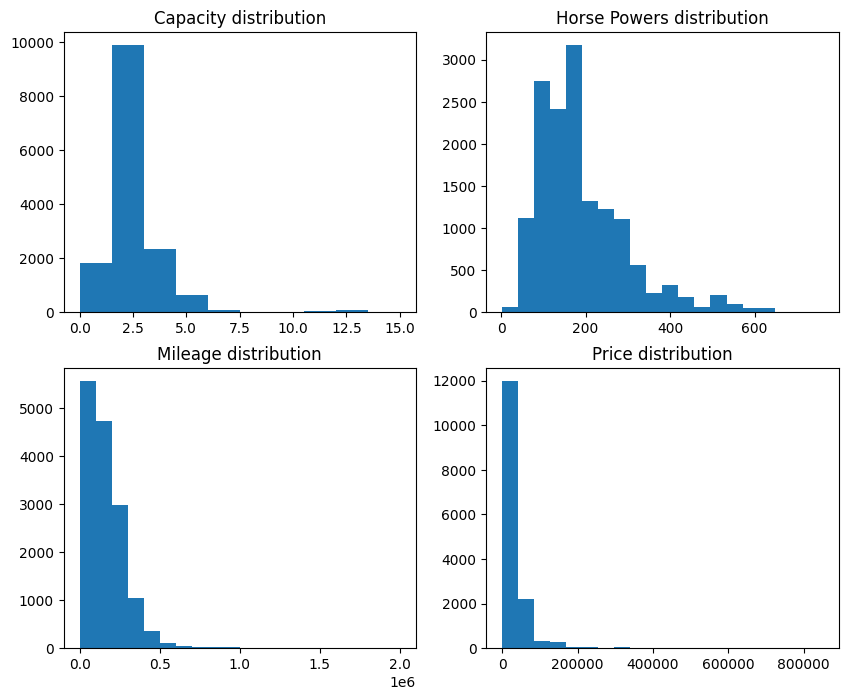

In [5]:
# check distribution of numerical variables
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0][0].hist(df['Capacity'], bins=10, label='Capacity')
ax[0][1].hist(df['HorsePowers'], bins=20, label='HorsePowers')
ax[1][0].hist(df['Mileage'], bins=20, label='Mileage')
ax[1][1].hist(df['Price'], bins=20, label='Price')

ax[0][0].set_title('Capacity distribution')
ax[0][1].set_title('Horse Powers distribution')
ax[1][0].set_title('Mileage distribution')
ax[1][1].set_title('Price distribution')

plt.show()

In [6]:
# looking at unique marks and models
print(f"Unique marks: {len(df['Mark'].unique())}")
print(f"Unique models: {len(df['Model'].unique())}")

Unique marks: 125
Unique models: 969


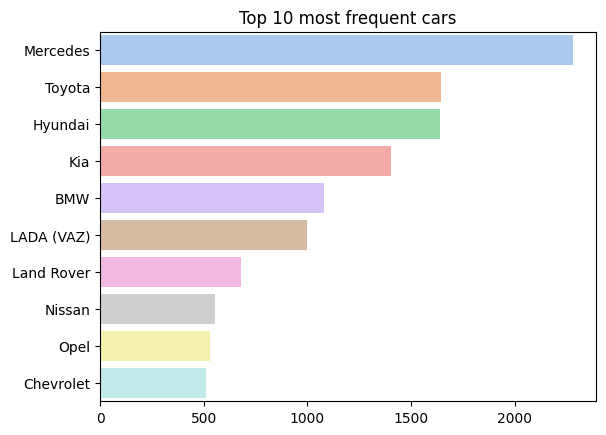

In [7]:
# looking at top-10 frequent marks
top_10_values = df['Mark'].value_counts()[:10]

sns.barplot(y=top_10_values.index, x=top_10_values.values, palette='pastel')
plt.title("Top 10 most frequent cars")
plt.show()

In [8]:
# keep only top-10 car brands in data
top_10_barnds = list(top_10_values.index)
df = df[df['Mark'].isin(top_10_barnds)]

# check unique brands in new dataset
df['Mark'].unique()

array(['Chevrolet', 'Toyota', 'Mercedes', 'Kia', 'Hyundai', 'Land Rover',
       'BMW', 'LADA (VAZ)', 'Nissan', 'Opel'], dtype=object)

In [9]:
# looking at top-10 models
top_10_models = df['Model'].value_counts()[:10]
top_10_models

Sorento        496
Santa Fe       483
Astra          387
Range Rover    366
Prius          360
Sonata         305
2107           303
E 220          303
Elantra        287
Camry          254
Name: Model, dtype: int64

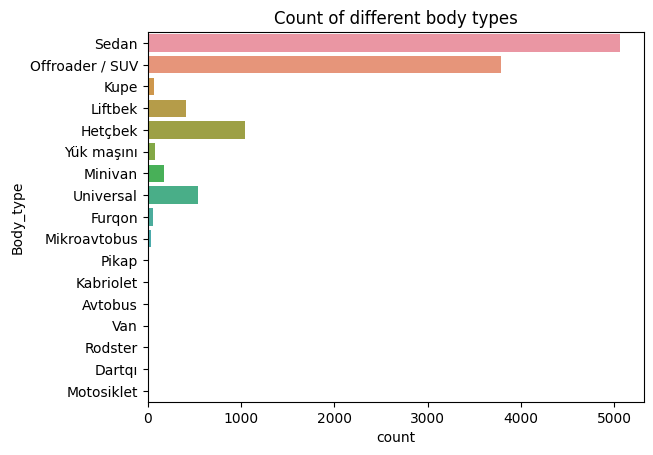

In [10]:
# looking at different body types
sns.countplot(y=df["Body_type"])

plt.title("Count of different body types")
plt.show()

## Data Preparation

In [11]:
# looking at column names
df.columns

Index(['Unnamed: 0', 'Mark', 'Model', 'Year', 'Body_type', 'Color', 'Capacity',
       'HorsePowers', 'EngineType', 'Transmission', 'Mileage', 'Is_new',
       'Price', 'Price_currency', 'Link'],
      dtype='object')

In [12]:
# drop unnecessary columns
df.drop(['Unnamed: 0', 'Link'], axis=1, inplace=True)

### Detecting and cleaning outliers

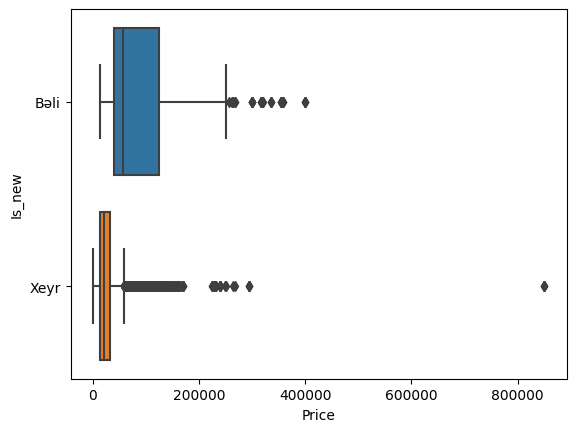

In [13]:
# looking at outliers in price column
sns.boxplot(x='Price', y='Is_new', data=df)

plt.show()

In [14]:
# calculate the IQR
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1

# identify outliers
outliers = df['Price'].loc[(df['Price'] < q1 - 1.5 * iqr) | (df['Price'] > q3 + 1.5 * iqr)]
print(f"Number of price outliers: {len(outliers)}")

Number of price outliers: 871


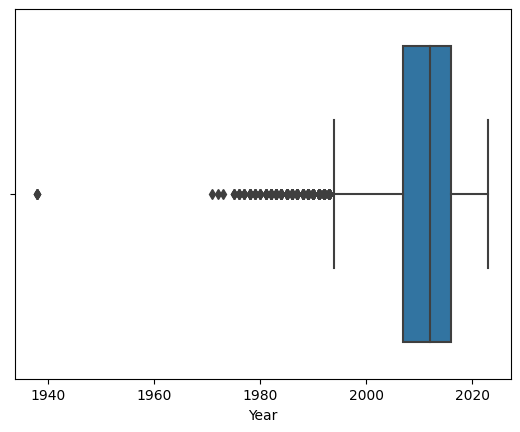

In [15]:
# looking at outliers in Year column
sns.boxplot(x=df['Year'])

plt.show()

In [16]:
# looking at outliers in Year column
q1 = df['Year'].quantile(0.25)
q3 = df['Year'].quantile(0.75)
iqr = q3 - q1

# identify outliers
outliers = df['Year'].loc[(df['Year'] < q1 - 1.5 * iqr) | (df['Year'] > q3 + 1.5 * iqr)]
print(f"Number of year outliers: {len(outliers)}")

Number of year outliers: 354


In [17]:
# drop outliers
df = df.drop(outliers.index)
df.shape

(10967, 13)

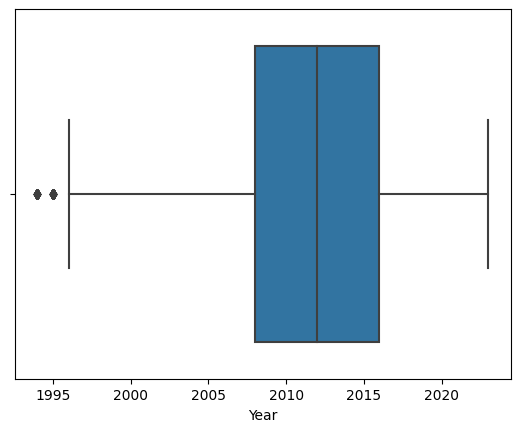

In [18]:
# check outliers in Year column
sns.boxplot(x=df['Year'])

plt.show()

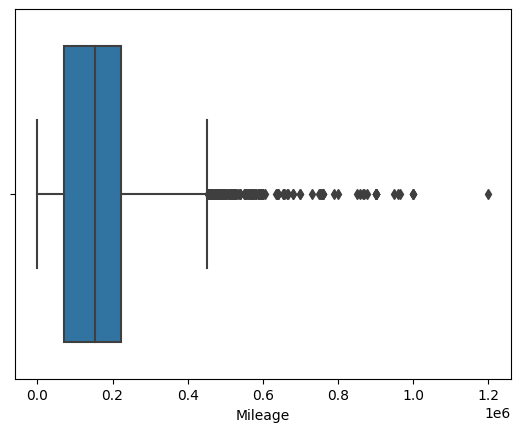

In [19]:
# looking at outliers in Mileage column
sns.boxplot(x=df['Mileage'])

plt.show()

In [20]:
# looking at outliers in Mileage column
q1 = df['Mileage'].quantile(0.25)
q3 = df['Mileage'].quantile(0.75)
iqr = q3 - q1

# identify outliers
outliers = df['Mileage'].loc[(df['Mileage'] < q1 - 1.5 * iqr) | (df['Mileage'] > q3 + 1.5 * iqr)]
print(f"Number of Mileage outliers: {len(outliers)}")

Number of Mileage outliers: 196


In [21]:
# drop outliers in Mileage column
df = df.drop(outliers.index)
df.shape

(10771, 13)

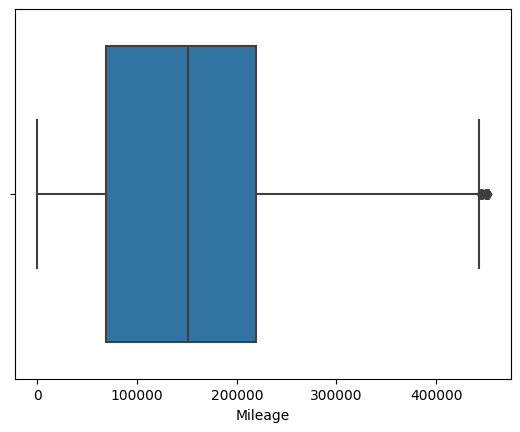

In [22]:
# check outliers in Mileage column
sns.boxplot(x=df['Mileage'])

plt.show()

In [23]:
df.head()

,Mark,Model,Year,Body_type,Color,Capacity,HorsePowers,EngineType,Transmission,Mileage,Is_new,Price,Price_currency
0,Chevrolet,Cobalt,2022,Sedan,Ağ,1.5,106,Benzin,Avtomat,0,Bəli,23000,AZN
1,Toyota,Prado,2008,Offroader / SUV,Ağ,2.7,163,Benzin,Avtomat,137500,Xeyr,37000,AZN
2,Mercedes,S 560 4Matic,2017,Sedan,Qara,4.0,469,Benzin,Avtomat,49000,Xeyr,89777,USD
3,Kia,Sorento,2020,Offroader / SUV,Mavi,1.6,230,Hibrid,Avtomat,22000,Xeyr,38500,USD
4,Mercedes,CLA 45 S AMG,2016,Sedan,Qara,2.0,381,Benzin,Avtomat,91000,Xeyr,37000,USD


In [24]:
# check currencies in dataset
df['Price_currency'].unique()

array(['AZN', 'USD', 'EUR'], dtype=object)

### Сonverting prices to one currency

In [25]:
# check different currencies
df['Price_currency'].value_counts()

AZN    7439
USD    3278
EUR      54
Name: Price_currency, dtype: int64

In [26]:
# setting the exchange rate
usd_azn = 1.7
eur_usd = 1.08

In [27]:
# change AZN to USD
df.loc[df['Price_currency'] == 'AZN', 'Price'] /= usd_azn

# change EUR to USD
df.loc[df['Price_currency'] == 'EUR', 'Price'] *= eur_usd

In [28]:
# drop currency column
df.drop('Price_currency', axis=1, inplace=True)
df.head()

,Mark,Model,Year,Body_type,Color,Capacity,HorsePowers,EngineType,Transmission,Mileage,Is_new,Price
0,Chevrolet,Cobalt,2022,Sedan,Ağ,1.5,106,Benzin,Avtomat,0,Bəli,13529.411765
1,Toyota,Prado,2008,Offroader / SUV,Ağ,2.7,163,Benzin,Avtomat,137500,Xeyr,21764.705882
2,Mercedes,S 560 4Matic,2017,Sedan,Qara,4.0,469,Benzin,Avtomat,49000,Xeyr,89777.000000
3,Kia,Sorento,2020,Offroader / SUV,Mavi,1.6,230,Hibrid,Avtomat,22000,Xeyr,38500.000000
4,Mercedes,CLA 45 S AMG,2016,Sedan,Qara,2.0,381,Benzin,Avtomat,91000,Xeyr,37000.000000


### Scaling numerical features

In [29]:
from sklearn.preprocessing import StandardScaler

# create a RobustScaler instance
scaler = StandardScaler()

# set numeric columns
numeric_columns = ['Mileage', 'HorsePowers']

# scale the numerical columns
scaled_data = scaler.fit_transform(df[numeric_columns])
df[numeric_columns] = scaled_data

In [30]:
# check scaled feature names
scaler.feature_names_in_

array(['Mileage', 'HorsePowers'], dtype=object)

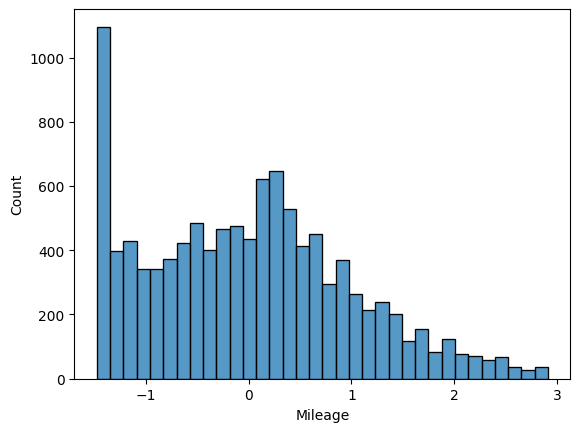

In [31]:
# check the scaled Mileage column's distribution
sns.histplot(df['Mileage'])

plt.show()

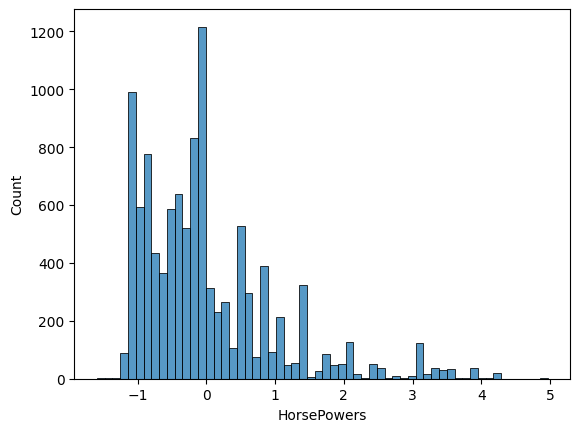

In [32]:
# check the scaled HorsePowers column's distribution
sns.histplot(df['HorsePowers'])

plt.show()

In [33]:
df.head()

,Mark,Model,Year,Body_type,Color,Capacity,HorsePowers,EngineType,Transmission,Mileage,Is_new,Price
0,Chevrolet,Cobalt,2022,Sedan,Ağ,1.5,-0.832018,Benzin,Avtomat,-1.478363,Bəli,13529.411765
1,Toyota,Prado,2008,Offroader / SUV,Ağ,2.7,-0.275271,Benzin,Avtomat,-0.143676,Xeyr,21764.705882
2,Mercedes,S 560 4Matic,2017,Sedan,Qara,4.0,2.713583,Benzin,Avtomat,-1.002729,Xeyr,89777.000000
3,Kia,Sorento,2020,Offroader / SUV,Mavi,1.6,0.379151,Hibrid,Avtomat,-1.264813,Xeyr,38500.000000
4,Mercedes,CLA 45 S AMG,2016,Sedan,Qara,2.0,1.854043,Benzin,Avtomat,-0.595043,Xeyr,37000.000000


In [34]:
# save training data
df.reset_index(drop=True).to_csv('clean_data.csv', index=False)

### Encoding categorical features

In [35]:
from sklearn.preprocessing import OneHotEncoder

# set the categorical columns
categorical_columns = ['Mark', 'Model', 'Body_type', 'Color', 'EngineType', 'Transmission']

# convert the categorical columns to dummy variables
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# concatenate encoded data with actual
df = pd.concat([df.drop(categorical_columns, axis=1), df_encoded], axis=1)

# encode Is_new column to 0 and 1 values
df['Is_new'] = df['Is_new'].map({'Bəli': 1, 'Xeyr': 0})

df.head()

/Users/akshinguseinov/miniconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Year,Capacity,HorsePowers,Mileage,Is_new,Price,Mark_BMW,Mark_Chevrolet,Mark_Hyundai,Mark_Kia,...,EngineType_Benzin,EngineType_Dizel,EngineType_Elektro,EngineType_Hibrid,EngineType_Plug-in Hibrid,EngineType_Qaz,Transmission_Avtomat,Transmission_Mexaniki,Transmission_Robotlaşdırılmış,Transmission_Variator
0,2022.0,1.5,-0.832018,-1.478363,1.0,13529.411765,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2008.0,2.7,-0.275271,-0.143676,0.0,21764.705882,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2017.0,4.0,2.713583,-1.002729,0.0,89777.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2020.0,1.6,0.379151,-1.264813,0.0,38500.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2016.0,2.0,1.854043,-0.595043,0.0,37000.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
encoder.feature_names_in_

array(['Mark', 'Model', 'Body_type', 'Color', 'EngineType',
       'Transmission'], dtype=object)

In [37]:
df.fillna(0, inplace=True)
df.isnull().sum().sum()

0

In [38]:
import pickle

# save the OneHotEncoder and StandardScaler objects to a pickle file
with open("objects.pkl", "wb") as f:
    pickle.dump({
        "encoder": encoder,
        "scaler": scaler
    }, f)

In [39]:
# data for used cars
df_used = df[df['Is_new'] == 0]
print(df_used.shape)

# data for new cars
df_new = df[df['Is_new'] == 1]
print(df_new.shape)

(12846, 448)
(861, 448)


### Modeling (for used cars)

In [40]:
# separate features and target
X = df_used.drop(['Price', 'Is_new'], axis=1)
y = df_used['Price']

In [41]:
# splitting train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

#### RandomForest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

# set up the RandomForestRegressor model
rf_regressor = RandomForestRegressor(max_depth=15, n_estimators=20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=20)

In [43]:
# making predictions
rf_y_pred = rf_regressor.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
# calculate the R2 metric
r2 = r2_score(y_test, rf_y_pred)
mape = mean_absolute_percentage_error(y_test, rf_y_pred)

print('R2:', r2)
print('MAPE:', mape)

R2: 0.934983508631646
MAPE: 0.09745342682818606


In [45]:
# save the model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(rf_regressor, f)

### Feature Importance Analysis

In [46]:
import shap

/Users/akshinguseinov/miniconda3/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/akshinguseinov/miniconda3/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimizat

In [47]:
explainer = shap.TreeExplainer(rf_regressor)
shap.initjs()
shap_values = explainer.shap_values(X_train.iloc[[700]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train.iloc[[0]])

In [48]:
len(list(filter(lambda x: x[1] != 0, zip(rf_regressor.feature_names_in_, rf_regressor.feature_importances_))))

326